# Performing a Multiple Linear Regression

In the next step we want to take the analysis a step further where multiple input variables will be considered, in this case we will use the features selected by the LassoLars feature selection processing, previously applied.


# 1. Imports

In [1]:
import os

import matplotlib.cm
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy
import pandas
import rsgislib.imagecalc
import rsgislib.imageutils
import rsgislib.regression
import rsgislib.tools.mapping
import rsgislib.tools.plotting
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

In [2]:
%matplotlib inline

# 2. Read the input plot data 

In [3]:
# Open the CSV file as a Pandas data frame - the df variable.
df = pandas.read_csv("../data/lidar/Forest_Plot_Metrics_LassoLars_Sel.csv", index_col=0)

# Get a list of the columns within the df dataframe
cols = list(df.columns)

# Get the indepedent predictor column names
ind_vars = cols[6:]

# 3. Fitting a Multiple Linear Regression

Using the scikit-learn library the following scripts fit multiple linear relationships for the three dependent variables

## 3.1 Vol / ha

In [4]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["Vol / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
vol_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "vol ="
for var_coef in zip(ind_vars, vol_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(vol_mdl.intercept_, 4))
print(eq_str)

vol = (Skew * -99.0561) + (CanopyRR * -228.951) + (Oligophotic_Prop * -223.9673) + (Euphotic_Prop * -138.231) + (p_mean * -38.1028) + (p_kurtosis * -83.1199) + (p_variation * -194.094) + (chm_rumple * 3.4549) + (chm_ruggedness * 10.4328) + (chm_vf * 0.0665) + (chm_vl * 0.0189) + (wv_midmin * 0.0342) + 385.9782


In [5]:
# Predict the values of stand volume using the model for the test data.
y_pred = vol_mdl.predict(x_test)
regress_vol_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_vol_stats

[{'r2': 0.7574009426449942,
  'explained_variance_score': 0.7776716509685727,
  'median_absolute_error': 29.73707674970558,
  'mean_absolute_error': 60.99081967087706,
  'mean_squared_error': 13734.068201567889,
  'root_mean_squared_error': 117.19244088919682,
  'norm_root_mean_squared_error': 40.23165377860149,
  'bias': -33.875795903063015,
  'norm_bias': -11.629412971568481,
  'bias_squared': 1147.5695480659808,
  'variance': 12586.498653501909,
  'noise': 0}]

Text(0, 0.5, 'Field Stem Volume')

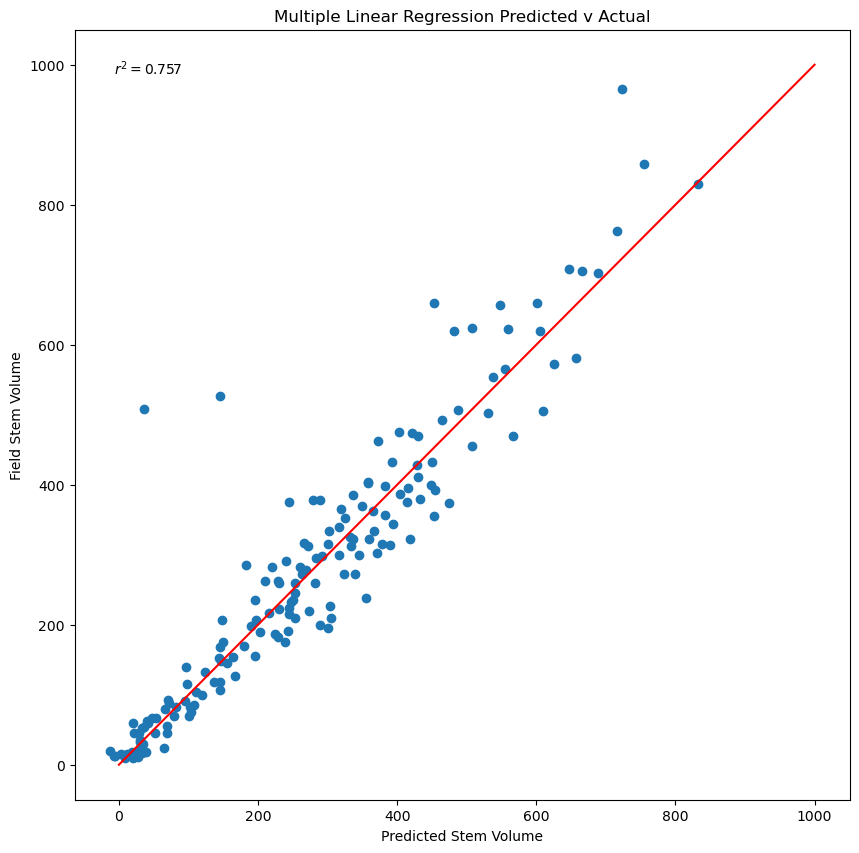

In [6]:
y_pred = vol_mdl.predict(x)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(y_pred, y)
plt.plot([0, 1000], [0, 1000], color="red")
rSqStr = "$r^2 = " + str(round(regress_vol_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Multiple Linear Regression Predicted v Actual")
plt.xlabel("Predicted Stem Volume")
plt.ylabel("Field Stem Volume")

## 3.2 BA / ha

In [7]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["BA / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
ba_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "ba ="
for var_coef in zip(ind_vars, ba_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(ba_mdl.intercept_, 4))
print(eq_str)

ba = (Skew * -12.0478) + (CanopyRR * -41.6633) + (Oligophotic_Prop * 19.17) + (Euphotic_Prop * 9.6014) + (p_mean * -3.4674) + (p_kurtosis * -19.1464) + (p_variation * 10.6573) + (chm_rumple * 0.7275) + (chm_ruggedness * 1.3611) + (chm_vf * 0.0028) + (chm_vl * 0.0026) + (wv_midmin * 0.0054) + 29.8184


In [8]:
# Predict the values of stand volume using the model for the test data.
y_pred = ba_mdl.predict(x_test)
regress_ba_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_ba_stats

[{'r2': 0.6201199647738342,
  'explained_variance_score': 0.6408918931016034,
  'median_absolute_error': 4.748808419118998,
  'mean_absolute_error': 7.803358476303149,
  'mean_squared_error': 195.1300400323625,
  'root_mean_squared_error': 13.968895447828453,
  'norm_root_mean_squared_error': 39.314800316722604,
  'bias': -3.266459213287714,
  'norm_bias': -9.193296076468878,
  'bias_squared': 10.669755792072191,
  'variance': 184.46028424029032,
  'noise': 0.0}]

Text(0, 0.5, 'Field Basal Area')

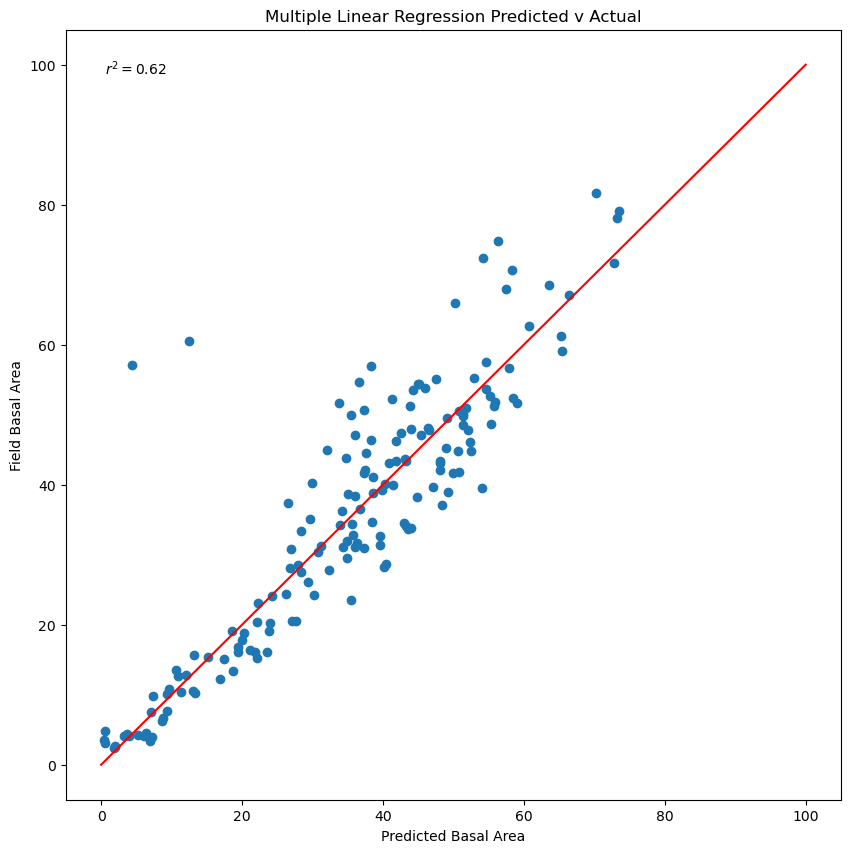

In [9]:
y_pred = ba_mdl.predict(x)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(y_pred, y)
plt.plot([0, 100], [0, 100], color="red")
rSqStr = "$r^2 = " + str(round(regress_ba_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Multiple Linear Regression Predicted v Actual")
plt.xlabel("Predicted Basal Area")
plt.ylabel("Field Basal Area")

## 3.3 Mean DBH

In [10]:
# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["Mean DBH"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
dbh_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "dbh ="
for var_coef in zip(ind_vars, dbh_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(dbh_mdl.intercept_, 4))
print(eq_str)

dbh = (Skew * -0.8515) + (CanopyRR * 2.4712) + (Oligophotic_Prop * -11.6747) + (Euphotic_Prop * -2.65) + (p_mean * 4.2386) + (p_kurtosis * 4.4009) + (p_variation * 6.9746) + (chm_rumple * -0.7578) + (chm_ruggedness * -0.4277) + (chm_vf * -0.0014) + (chm_vl * 0.0042) + (wv_midmin * -0.0005) + 3.0218


In [11]:
# Predict the values of stand volume using the model for the test data.
y_pred = dbh_mdl.predict(x_test)
regress_dbh_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_dbh_stats

[{'r2': 0.4011302623314349,
  'explained_variance_score': 0.41001956271284146,
  'median_absolute_error': 1.724851051551945,
  'mean_absolute_error': 3.087519185811749,
  'mean_squared_error': 31.388337833564613,
  'root_mean_squared_error': 5.602529592386337,
  'norm_root_mean_squared_error': 32.231134710852025,
  'bias': 0.6825771822265968,
  'norm_bias': 3.926839965432198,
  'bias_squared': 0.4659116096964007,
  'variance': 30.922426223868214,
  'noise': 0}]

Text(0, 0.5, 'Field DBH')

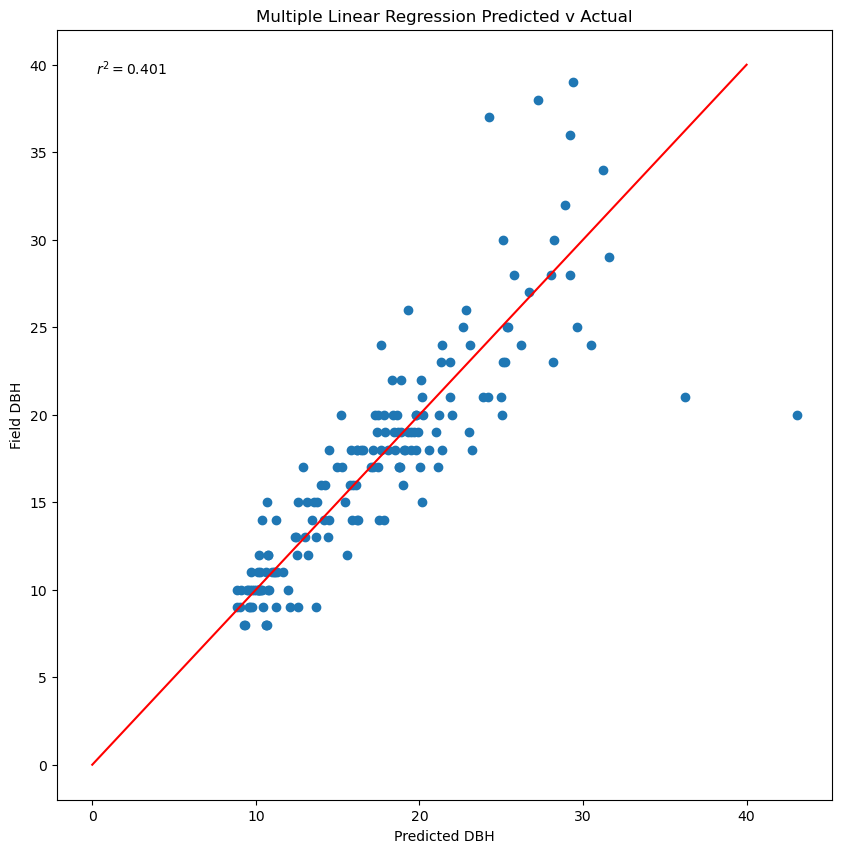

In [12]:
y_pred = dbh_mdl.predict(x)

# Plot the relationship
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
plt.scatter(y_pred, y)
plt.plot([0, 40], [0, 40], color="red")
rSqStr = "$r^2 = " + str(round(regress_dbh_stats[0]["r2"], 3)) + "$"
plt.text(0.05, 0.95, rSqStr, va="center", transform=ax1.transAxes)
plt.title("Multiple Linear Regression Predicted v Actual")
plt.xlabel("Predicted DBH")
plt.ylabel("Field DBH")

# 4. Summarising Results

Within the code above you will see that the data is split to create testing and training datasets, as you would with a classification problem. The testing data can then be used to estimate the accuracy of the model developed, and summarised in the table below:

| Dependant Variable | R2    | MAE  | MSE     | RMSE   | %RMSE  |
| ------------------ | ----- | ---- | ------  | ------ | ------ |
| Vol / ha           | 0.757 | 61.0 | 13734.1 | 117.2  | 40.2 % |
| BA / ha            | 0.620 | 7.8  | 195.1   | 14.0   | 39.3 % |
| Mean DBH           | 0.401 | 3.1  | 31.4    | 5.6    | 32.2 % |



# 5. Applying our Model to the Image Data

To apply the models, we have just fitted, to the image data is pretty straight forward, we just use band maths, ensuring we know which band in the input image is associated with the variable we have used within the relationship (note, check the band descriptions!). For the multiple linear regression, the expression can get quite complex but to reduce errors associated with transferring the model, the model fitting scripts output the equation in a format which can be copy and pasted into the code below:

## 5.1 Create output directory

In [13]:
out_dir = "multi_linear_out_imgs"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

## 5.2 Define the input image

In [14]:
input_img = "../data/lidar/Forest_ALS_Metrics.kea"
vld_msk_img = "../data/lidar/Forest_ALS_Valid.kea"

# Define the band information, from the input image. This is the same for all three models.
band_info = []
band_info.append(rsgislib.imagecalc.BandDefn("vld_msk", vld_msk_img, 1))
band_info.append(rsgislib.imagecalc.BandDefn("Skew", input_img, 24))
band_info.append(rsgislib.imagecalc.BandDefn("CanopyRR", input_img, 27))
band_info.append(rsgislib.imagecalc.BandDefn("Oligophotic_Prop", input_img, 41))
band_info.append(rsgislib.imagecalc.BandDefn("Euphotic_Prop", input_img, 42))
band_info.append(rsgislib.imagecalc.BandDefn("p_mean", input_img, 43))
band_info.append(rsgislib.imagecalc.BandDefn("p_kurtosis", input_img, 46))
band_info.append(rsgislib.imagecalc.BandDefn("p_variation", input_img, 47))
band_info.append(rsgislib.imagecalc.BandDefn("chm_rumple", input_img, 48))
band_info.append(rsgislib.imagecalc.BandDefn("chm_ruggedness", input_img, 49))
band_info.append(rsgislib.imagecalc.BandDefn("chm_vf", input_img, 51))
band_info.append(rsgislib.imagecalc.BandDefn("chm_vl", input_img, 52))
band_info.append(rsgislib.imagecalc.BandDefn("wv_midmin", input_img, 61))

## 5.3 Define output GTIFF Options

In [15]:
rsgislib.imageutils.set_env_vars_lzw_gtiff_outs()

## 5.4 Apply Vol / ha 

In [16]:
vol_out_img = os.path.join(out_dir, "Forest_ALS_Volume.tif")

# Check that pixel is within the valid mask (i.e., is equal to 1)
vol_exp = "vld_msk==1?(Skew * -99.0561) + (CanopyRR * -228.951) + (Oligophotic_Prop * -223.9673) + (Euphotic_Prop * -138.231) + (p_mean * -38.1028) + (p_kurtosis * -83.1199) + (p_variation * -194.094) + (chm_rumple * 3.4549) + (chm_ruggedness * 10.4328) + (chm_vf * 0.0665) + (chm_vl * 0.0189) + (wv_midmin * 0.0342) + 385.9782:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    vol_out_img, vol_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    vol_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'Skew' is band 24
	 Variable 'CanopyRR' is band 27
	 Variable 'Oligophotic_Prop' is band 41
	 Variable 'Euphotic_Prop' is band 42
	 Variable 'p_mean' is band 43
	 Variable 'p_kurtosis' is band 46
	 Variable 'p_variation' is band 47
	 Variable 'chm_rumple' is band 48
	 Variable 'chm_ruggedness' is band 49
	 Variable 'chm_vf' is band 51
	 Variable 'chm_vl' is band 52
	 Variable 'wv_midmin' is band 61
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




## 5.5 Apply BA / ha

In [17]:
ba_out_img = os.path.join(out_dir, "Forest_ALS_BA.tif")

# Check that pixel is within the valid mask (i.e., is equal to 1)
ba_exp = "vld_msk==1?(Skew * -12.0478) + (CanopyRR * -41.6633) + (Oligophotic_Prop * 19.17) + (Euphotic_Prop * 9.6014) + (p_mean * -3.4674) + (p_kurtosis * -19.1464) + (p_variation * 10.6573) + (chm_rumple * 0.7275) + (chm_ruggedness * 1.3611) + (chm_vf * 0.0028) + (chm_vl * 0.0026) + (wv_midmin * 0.0054) + 29.8184:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    ba_out_img, ba_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    ba_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'Skew' is band 24
	 Variable 'CanopyRR' is band 27
	 Variable 'Oligophotic_Prop' is band 41
	 Variable 'Euphotic_Prop' is band 42
	 Variable 'p_mean' is band 43
	 Variable 'p_kurtosis' is band 46
	 Variable 'p_variation' is band 47
	 Variable 'chm_rumple' is band 48
	 Variable 'chm_ruggedness' is band 49
	 Variable 'chm_vf' is band 51
	 Variable 'chm_vl' is band 52
	 Variable 'wv_midmin' is band 61
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




## 5.6 Apply DBH

In [18]:
dbh_out_img = os.path.join(out_dir, "Forest_ALS_DBH.tif")

# Check that pixel is within the valid mask (i.e., is equal to 1)
dbh_exp = "vld_msk==1?(Skew * -0.8515) + (CanopyRR * 2.4712) + (Oligophotic_Prop * -11.6747) + (Euphotic_Prop * -2.65) + (p_mean * 4.2386) + (p_kurtosis * 4.4009) + (p_variation * 6.9746) + (chm_rumple * -0.7578) + (chm_ruggedness * -0.4277) + (chm_vf * -0.0014) + (chm_vl * 0.0042) + (wv_midmin * -0.0005) + 3.0218:0"

# Apply the model to the image and then calculate the image stats and pyramids for visualisation
rsgislib.imagecalc.band_math(
    dbh_out_img, dbh_exp, "GTIFF", rsgislib.TYPE_32FLOAT, band_info
)
rsgislib.imageutils.pop_img_stats(
    dbh_out_img, use_no_data=True, no_data_val=0, calc_pyramids=True
)

Image: ../data/lidar/Forest_ALS_Metrics.kea
	 Variable 'Skew' is band 24
	 Variable 'CanopyRR' is band 27
	 Variable 'Oligophotic_Prop' is band 41
	 Variable 'Euphotic_Prop' is band 42
	 Variable 'p_mean' is band 43
	 Variable 'p_kurtosis' is band 46
	 Variable 'p_variation' is band 47
	 Variable 'chm_rumple' is band 48
	 Variable 'chm_ruggedness' is band 49
	 Variable 'chm_vf' is band 51
	 Variable 'chm_vl' is band 52
	 Variable 'wv_midmin' is band 61
Image: ../data/lidar/Forest_ALS_Valid.kea
	 Variable 'vld_msk' is band 1
New image width = 3053 height = 2637 bands = 1



Calculating Image Pyramids.




# 6. Visualise Image Results

Image Data Size: 501 x 538
Image Data Size: 501 x 538
Image Data Size: 501 x 538


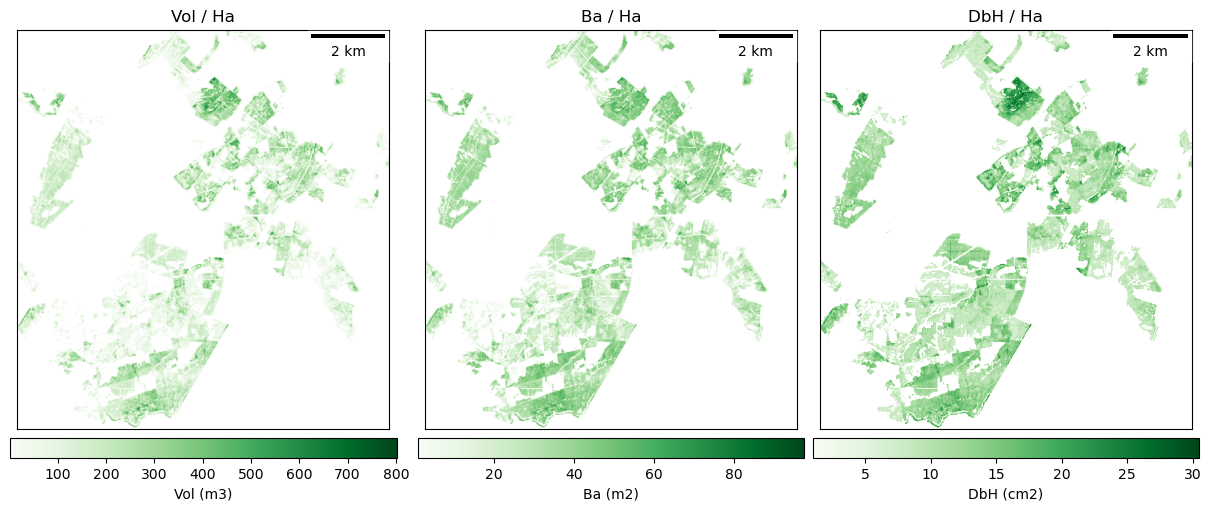

In [19]:
sub_bbox = [291171, 301190, 246680, 257452]

fig = plt.figure(figsize=(12, 5), constrained_layout=True)  #
gspec = gridspec.GridSpec(
    ncols=3,
    nrows=2,
    height_ratios=[1, 0.05],
    width_ratios=[1, 1, 1],
    figure=fig,
)

ax_00 = fig.add_subplot(gspec[0, 0])
vol_cmap, vol_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_00,
    input_img=vol_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="Vol / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_00.set_xticks([])
ax_00.set_yticks([])

ax_10 = fig.add_subplot(gspec[1, 0])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=vol_norm, cmap=vol_cmap),
    cax=ax_10,
    orientation="horizontal",
    ticklocation="bottom",
    label="Vol (m3)",
)

ax_01 = fig.add_subplot(gspec[0, 1])
ba_cmap, ba_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_01,
    input_img=ba_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="Ba / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_01.set_xticks([])
ax_01.set_yticks([])

ax_11 = fig.add_subplot(gspec[1, 1])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=ba_norm, cmap=ba_cmap),
    cax=ax_11,
    orientation="horizontal",
    ticklocation="bottom",
    label="Ba (m2)",
)


ax_02 = fig.add_subplot(gspec[0, 2])
dbh_cmap, dbh_norm = rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax=ax_02,
    input_img=dbh_out_img,
    img_band=1,
    bbox=sub_bbox,
    title_str="DbH / Ha",
    show_scale_bar=True,
    use_grid=False,
    show_map_axis=True,
    cmap_name="Greens",
    norm_img_vals=True,
    use_log_norm=False,
    norm_vmin=1,
    norm_vmax=None,
    vals_under_white=True,
)
ax_02.set_xticks([])
ax_02.set_yticks([])

ax_12 = fig.add_subplot(gspec[1, 2])
cbar = fig.colorbar(
    mappable=matplotlib.cm.ScalarMappable(norm=dbh_norm, cmap=dbh_cmap),
    cax=ax_12,
    orientation="horizontal",
    ticklocation="bottom",
    label="DbH (cm2)",
)

# 7. The Importance of Feature Selection

Earlier, we applied three methods of selecting features based on their importance and we have just seen that by selecting just a single variable we can get a model which in some ways produces a better model that using multiple variables. Try fitting a model for volume and compare the results from the different selected features:


## 7.1 Variance-based feature selection

In [20]:
# Open the CSV file as a Pandas data frame - the df variable.
df = pandas.read_csv("Forest_Plot_Metrics_CQV_Sel.csv", index_col=0)

# Get a list of the columns within the df dataframe
cols = list(df.columns)

# Get the indepedent predictor column names
ind_vars = cols[6:]

# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["Vol / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
vol_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "vol ="
for var_coef in zip(ind_vars, vol_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(vol_mdl.intercept_, 4))
print(eq_str)

# Predict the values of stand volume using the model for the test data.
y_pred = vol_mdl.predict(x_test)
regress_vol_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_vol_stats

vol = (LPI * 116.8885) + (GapFrac * -203.6735) + (hMean * -365.2256) + (qhMean * 1294.7925) + (h25 * 228.7111) + (h50 * 106.8575) + (h60 * -244.2789) + (h70 * -560.7917) + (h75 * 451.0971) + (h80 * -201.7926) + (h90 * -6.8928) + (h95 * -42.8743) + (h99 * -38.0642) + (hmax * 6.6987) + (IQR * 222.386) + (L_mean * -365.2256) + (L_scale * 205.6824) + (Closed_Vol * 0.0136) + (Open_Vol * 0.0148) + (Oligophotic_Vol * 0.1602) + (cvm_filled_vol * -0.0032) + (Closed_Prop * 483.4145) + (Open_Prop * -198.3253) + (Oligophotic_Prop * -461.5191) + (p_mean * 23.3014) + (p_scale * -95.5607) + (p_skewness * -62.5574) + (p_kurtosis * 69.7848) + (chm_rumple * 7.2042) + (chm_ruggedness * 15.1982) + (chm_roughness * -5.0294) + (chm_vf * 6097.7632) + (chm_vl * -6097.7663) + (chm_vd * -6097.7789) + (wv_auc * 60.2463) + (wv_mid * -37.857) + (wv_width * -12.7814) + (wv_midmax * 0.0008) + (h25f * -6.2317) + (h50f * 251.3894) + (h60f * 231.8856) + (h70f * -367.1644) + (h75f * 897.0973) + (h80f * -667.3747) + (h85

[{'r2': 0.877824341969713,
  'explained_variance_score': 0.8792721906560355,
  'median_absolute_error': 44.15553392593644,
  'mean_absolute_error': 58.695717339383314,
  'mean_squared_error': 6916.633717599127,
  'root_mean_squared_error': 83.1663015746109,
  'norm_root_mean_squared_error': 28.55062856963621,
  'bias': -9.053502660380069,
  'norm_bias': -3.1080279730707017,
  'bias_squared': 81.96591042150898,
  'variance': 6834.667807177619,
  'noise': 0}]

## 7.2 Correlation-based feature selection

In [21]:
# Open the CSV file as a Pandas data frame - the df variable.
df = pandas.read_csv("Forest_Plot_Metrics_Corr_Sel.csv", index_col=0)

# Get a list of the columns within the df dataframe
cols = list(df.columns)

# Get the indepedent predictor column names
ind_vars = cols[6:]

# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["Vol / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
vol_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "vol ="
for var_coef in zip(ind_vars, vol_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(vol_mdl.intercept_, 4))
print(eq_str)

# Predict the values of stand volume using the model for the test data.
y_pred = vol_mdl.predict(x_test)
regress_vol_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_vol_stats

vol = (N_Pulses * 0.0203) + (N_Returns * -0.0134) + (FCI * 6.4053) + (LCI * -2.5934) + (VCC * -4.5048) + (h75 * 124.5292) + (IQR * 19.6445) + (Skew * 11.8862) + (Kurtosis * -6.6348) + (Closed_Vol * -0.0971) + (Open_Vol * 0.0341) + (Oligophotic_Vol * -0.0201) + (Euphotic_Vol * -0.0058) + (cvm_filled_vol * -0.0259) + (p_mean * 126.9904) + (p_scale * -314.2596) + (chm_rumple * 14.8838) + (chm_ruggedness * 19.0863) + (chm_roughness * -7.4166) + (chm_vf * 4519.8389) + (chm_vl * -4519.8318) + (chm_vd * -4519.8354) + (wv_peaks * 8.4558) + (wv_auc * -0.6026) + (wv_min * 11.6988) + (wv_max * 19.8369) + (wv_width * -8.1381) + (wv_midmin * 0.0364) + (wv_midmax * 0.0063) + (wv_minmax * -0.0064) + (h90f * -143.9388) + (h95f * 52.9596) + (L_mean_f * 46.9796) + -198.7833


[{'r2': 0.8913210302817877,
  'explained_variance_score': 0.892210495075108,
  'median_absolute_error': 28.441701610377194,
  'mean_absolute_error': 47.83709599295435,
  'mean_squared_error': 6152.556396795336,
  'root_mean_squared_error': 78.43823300403533,
  'norm_root_mean_squared_error': 26.927503252596942,
  'bias': 7.0960950912047185,
  'norm_bias': 2.4360584925379687,
  'bias_squared': 50.3545655434197,
  'variance': 6102.201831251916,
  'noise': 0.0}]

## 7.3 All Variables (i.e., not feature selection)

In [22]:
# Open the CSV file as a Pandas data frame - the df variable.
df = pandas.read_csv("../data/lidar/Forest_Plot_Metrics.csv")

# Get a list of the columns within the df dataframe
cols = list(df.columns)

# Get the indepedent predictor column names
ind_vars = cols[6:]

# Get the chm_vf predictor variable and 'Vol / ha' dependent variable
# from the dataframe as numpy arrays
x = df[ind_vars].values
y = df["Vol / ha"].values

# Randomly sample the input data to create training and testing (20% sample) datasets
# so we have an independent dataset to test the quality of the relationship
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=0
)

# Create a LinearRegression object
lm = sklearn.linear_model.LinearRegression()

# Fit the model using the training data
vol_mdl = lm.fit(x_train, y_train)

# Print the equation of the model
eq_str = "vol ="
for var_coef in zip(ind_vars, vol_mdl.coef_):
    eq_str = "{} ({} * {}) +".format(eq_str, var_coef[0], round(var_coef[1], 4))
eq_str = "{} {}".format(eq_str, round(vol_mdl.intercept_, 4))
print(eq_str)

# Predict the values of stand volume using the model for the test data.
y_pred = vol_mdl.predict(x_test)
regress_vol_stats = rsgislib.regression.get_regression_stats(y_test, y_pred, n_vars=1)
regress_vol_stats

vol = (N_Pulses * 0.0242) + (N_Returns * -0.0163) + (First_Return * 342.6973) + (Multi_Return * -342.6973) + (LPI * -96.6349) + (CDensity * -33065.3346) + (FCI * 13.7558) + (LCI * 4.1354) + (GapFrac * -31768.4829) + (VCC * -3.2431) + (hMean * -728.5003) + (qhMean * 1717.8538) + (h25 * 82.9013) + (h50 * 13.2979) + (h60 * -46.5363) + (h70 * -383.0779) + (h75 * 361.2976) + (h80 * -45.3703) + (h90 * 250.1199) + (h95 * -273.5172) + (h99 * -26.802) + (hmax * -44.3961) + (IQR * 278.3963) + (Skew * 183.8789) + (Kurtosis * -66.3252) + (VDR * 1392.6915) + (CanopyRR * -1971.2181) + (L_mean * -728.5003) + (L_scale * -1523.4388) + (L_skewness * -2507.3716) + (L_kurtosis * 3340.3241) + (L_variation * 1025.433) + (Closed_Vol * -0.0989) + (Open_Vol * 0.081) + (Oligophotic_Vol * 0.0667) + (Euphotic_Vol * -0.05) + (cvm_filled_vol * 0.0167) + (cvm_filled_prop * -1357.8994) + (Closed_Prop * -1138.6559) + (Open_Prop * -1985.5818) + (Oligophotic_Prop * -502.4077) + (Euphotic_Prop * -855.4917) + (p_mean * 28

[{'r2': 0.8441113562075699,
  'explained_variance_score': 0.8464273880304667,
  'median_absolute_error': 42.34731201833347,
  'mean_absolute_error': 60.85913145208863,
  'mean_squared_error': 8825.200266801367,
  'root_mean_squared_error': 93.94253704686375,
  'norm_root_mean_squared_error': 32.2500632026794,
  'bias': -11.450575286634644,
  'norm_bias': -3.930932549935156,
  'bias_squared': 131.11567439488806,
  'variance': 8694.084592406478,
  'noise': 0.0}]

## 7.4 Summary

So, what does this table above show us? The more features which have been used for the model the higher the R2. The RMSE shows us that the single parameter simple regression has the least error, followed by the CQV, correlation, all the variables and then LassoLars, which has actually performed worse than applying a regression with no feature selection. From these metrics we would probably the single parameter model. The other thing to note here is that while R2 provides us some useful information on the fit of the model it is not a useful metric for comparing the quality of individual models.